In [1]:
#MISSING DATA HANDLING 
import os 
os.chdir('C:\\Users\\User\\Desktop\\DataScience Data')
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt

MISSING DATA 

In [2]:
#Reading the data
migrates = pd.read_csv('MissingMigrants-Global-2019-03-29T18-36-07.csv', parse_dates = ['Reported Date'])

In [5]:
len(migrates)

5333

In [3]:
migrates.sample(5)

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
1832,44287,North Africa,2017-11-21,2017,Nov,1.0,NaN,1,NaN,1.0,NaN,1.0,Harsh weather/lack of adequate shelter,"Unspecified location in the Sahara desert, Libya",Mixed Migration Monitoring Mechanism Initiativ...,"14.062500000000, 25.195311080000",NaN,NaN,Northern Africa,2
2099,44498,South Asia,2017-09-19,2017,Sep,1.0,NaN,1,NaN,NaN,1.0,NaN,Vehicle Accident,"Jiroft, Kerman province, Iran",IOM Afghanistan,"28.675112400000, 57.737156900000",NaN,NaN,Southern Asia,4
4899,41036,US-Mexico Border,2015-06-18,2015,Jun,1.0,NaN,1,19.0,1.0,NaN,NaN,Vehicle Accident,"Encinitas, California, San Diego County",CTV News,"32.591521000000, -117.120961700000",Central America to US,http://bit.ly/1I8WLh9,Uncategorized,1
825,45740,US-Mexico Border,2018-07-06,2018,Jul,1.0,NaN,1,NaN,NaN,1.0,NaN,Drowning,"All-American Canal, Calexico, Imperial County,...","Consulado de México en Calexico, Imperial Coun...","32.680756666024, -115.448101148300",Central America to US,NaN,Northern America,5
387,51388,Sub-Saharan Africa,2018-10-07,2018,Oct,1.0,NaN,1,NaN,NaN,1.0,NaN,Vehicle Accident,"Niangoloko, Burkina Faso",Mixed Migration Monitoring Mechanism Initiativ...,"10.283333000000, -4.916667000000",NaN,http://www.mixedmigration.org/4mi/,Western Africa,2


In [4]:
#counting missing 
missing_count = migrates.isnull().sum()

In [5]:
missing_count[:]

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                             191
Minimum Estimated Number of Missing    4830
Total Dead and Missing                    0
Number of Survivors                    4584
Number of Females                      4436
Number of Males                        2520
Number of Children                     4689
Cause of Death                            0
Location Description                     10
Information Source                        2
Location Coordinates                      1
Migration Route                        2673
URL                                    2141
UNSD Geographical Grouping               11
Source Quality                            0
dtype: int64

In [6]:
#percentage of missing data
total_cells = np.product(migrates.shape)
total_missing = missing_count.sum()
(total_missing/total_cells) * 100

24.45902868929308

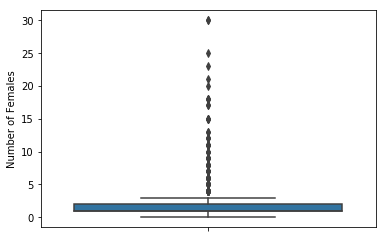

In [7]:
#checking out for the outliers 
sns.boxplot(y='Number of Females', data = migrates)

In [8]:
#dropping the columns with Nan
columns_with_na_dropped = migrates.dropna(axis=1)
columns_with_na_dropped.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Total Dead and Missing,Cause of Death,Source Quality
0,51591,Mediterranean,2019-03-28,2019,Mar,2,Presumed drowning,5
1,51588,Mediterranean,2019-03-26,2019,Mar,4,Presumed drowning,5
2,51589,Mediterranean,2019-03-26,2019,Mar,1,Presumed drowning,3
3,51590,Mediterranean,2019-03-26,2019,Mar,1,Presumed drowning,1
4,51587,Central America,2019-03-25,2019,Mar,1,Fall from train,3


In [9]:
len(columns_with_na_dropped)

5333

In [10]:
migrates.drop('Web ID', axis= 1, inplace=True)

In [11]:
migrates.head()

,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,Mediterranean,2019-03-28,2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,Mediterranean,2019-03-26,2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,Mediterranean,2019-03-26,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,Central America,2019-03-25,2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [13]:
migrates.interpolate(inplace=True)
migrates

,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,Mediterranean,2019-03-28,2019,Mar,NaN,2.000000,2,36.000000,NaN,2.000000,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,Mediterranean,2019-03-26,2019,Mar,4.0,2.000000,4,11.000000,3.000000,1.750000,1.000000,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,Mediterranean,2019-03-26,2019,Mar,1.0,2.000000,1,11.363636,2.666667,1.500000,1.000000,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,Mediterranean,2019-03-26,2019,Mar,1.0,2.000000,1,11.727273,2.333333,1.250000,1.000000,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,Central America,2019-03-25,2019,Mar,1.0,2.000000,1,12.090909,2.000000,1.000000,1.000000,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3
5,US-Mexico Border,2019-03-23,2019,Mar,1.0,2.000000,1,12.454545,1.666667,2.000000,1.000000,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",Pima County Office of the Medical Examiner,"32.057499000000, -111.666072500000",NaN,http://www.humaneborders.info/,Northern America,5
6,US-Mexico Border,2019-03-23,2019,Mar,1.0,2.000000,1,12.818182,1.333333,3.000000,1.000000,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",Pima County Office of the Medical Examiner,"32.057499000000, -111.666072500000",NaN,http://www.humaneborders.info/,Northern America,5
7,Southeast Asia,2019-03-23,2019,Mar,8.0,2.000000,10,13.181818,1.000000,4.000000,1.000000,Vehicle Accident,"Sa Setthi intersection in Tambon Ban Mai, Tha ...","The Nation, Vietnam+","13.865704814542, 99.587248723929",NaN,"http://bit.ly/2YqrMsT, http://bit.ly/2TzbavA",South-eastern Asia,3
8,Mediterranean,2019-03-23,2019,Mar,4.0,4.000000,8,13.545455,3.000000,5.000000,1.000000,Presumed drowning,"Off the coast of Sfax, Tunisia","Shems FM, Tunisie Numérique, Kapitalis","35.317034468315, 11.078928258810",Central Mediterranean,"http://bit.ly/2U1K4C4, http://bit.ly/2HJW70B, ...",Uncategorized,3
9,US-Mexico Border,2019-03-21,2019,Mar,1.0,3.750000,1,13.909091,3.000000,3.666667,1.000000,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",Pima County Office of the Medical Examiner,"32.057499000000, -111.666072500000",NaN,http://www.humaneborders.info/,Northern America,5


In [14]:
migrates.fillna(method='bfill', inplace=True)
migrates

,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,Mediterranean,2019-03-28,2019,Mar,4.0,2.000000,2,36.000000,3.000000,2.000000,1.000000,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
1,Mediterranean,2019-03-26,2019,Mar,4.0,2.000000,4,11.000000,3.000000,1.750000,1.000000,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,Mediterranean,2019-03-26,2019,Mar,1.0,2.000000,1,11.363636,2.666667,1.500000,1.000000,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,Mediterranean,2019-03-26,2019,Mar,1.0,2.000000,1,11.727273,2.333333,1.250000,1.000000,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,Central America,2019-03-25,2019,Mar,1.0,2.000000,1,12.090909,2.000000,1.000000,1.000000,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",Central Mediterranean,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3
5,US-Mexico Border,2019-03-23,2019,Mar,1.0,2.000000,1,12.454545,1.666667,2.000000,1.000000,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",Pima County Office of the Medical Examiner,"32.057499000000, -111.666072500000",Central Mediterranean,http://www.humaneborders.info/,Northern America,5
6,US-Mexico Border,2019-03-23,2019,Mar,1.0,2.000000,1,12.818182,1.333333,3.000000,1.000000,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",Pima County Office of the Medical Examiner,"32.057499000000, -111.666072500000",Central Mediterranean,http://www.humaneborders.info/,Northern America,5
7,Southeast Asia,2019-03-23,2019,Mar,8.0,2.000000,10,13.181818,1.000000,4.000000,1.000000,Vehicle Accident,"Sa Setthi intersection in Tambon Ban Mai, Tha ...","The Nation, Vietnam+","13.865704814542, 99.587248723929",Central Mediterranean,"http://bit.ly/2YqrMsT, http://bit.ly/2TzbavA",South-eastern Asia,3
8,Mediterranean,2019-03-23,2019,Mar,4.0,4.000000,8,13.545455,3.000000,5.000000,1.000000,Presumed drowning,"Off the coast of Sfax, Tunisia","Shems FM, Tunisie Numérique, Kapitalis","35.317034468315, 11.078928258810",Central Mediterranean,"http://bit.ly/2U1K4C4, http://bit.ly/2HJW70B, ...",Uncategorized,3
9,US-Mexico Border,2019-03-21,2019,Mar,1.0,3.750000,1,13.909091,3.000000,3.666667,1.000000,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",Pima County Office of the Medical Examiner,"32.057499000000, -111.666072500000",Central Mediterranean,http://www.humaneborders.info/,Northern America,5


In [15]:
migrates.isnull().sum()

Region of Incident                     0
Reported Date                          0
Reported Year                          0
Reported Month                         0
Number Dead                            0
Minimum Estimated Number of Missing    0
Total Dead and Missing                 0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Cause of Death                         0
Location Description                   0
Information Source                     0
Location Coordinates                   0
Migration Route                        0
URL                                    0
UNSD Geographical Grouping             0
Source Quality                         0
dtype: int64

AUTOMATIC FILL UP WITH 0

In [18]:
subset_migrates = migrates.loc[:, :'Source Quality'].head()

In [19]:
subset_migrates.fillna(0)

,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,Mediterranean,2019-03-28,2019,Mar,4.0,2.0,2,36.000000,3.000000,2.00,1.0,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
1,Mediterranean,2019-03-26,2019,Mar,4.0,2.0,4,11.000000,3.000000,1.75,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,Mediterranean,2019-03-26,2019,Mar,1.0,2.0,1,11.363636,2.666667,1.50,1.0,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,Mediterranean,2019-03-26,2019,Mar,1.0,2.0,1,11.727273,2.333333,1.25,1.0,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,Central America,2019-03-25,2019,Mar,1.0,2.0,1,12.090909,2.000000,1.00,1.0,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",Central Mediterranean,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3
